# A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data and do exploratory data analysis. Describe the data briefly.

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

## # 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
print(data.info())
print("Shape of the data:",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB
None
Shape of the data: (210, 7)


In [5]:
data.shape

(210, 7)

In [6]:
data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [7]:
print("Duplicate present in data:",data.duplicated().sum())

Duplicate present in data: 0


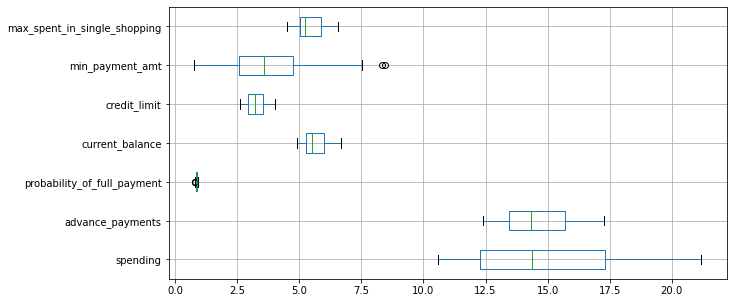

In [8]:
plt.figure(figsize=(10,5))
data.boxplot(vert=False)

In [9]:
data['probability_of_full_payment'].fillna(data['probability_of_full_payment'].median(),inplace= True)

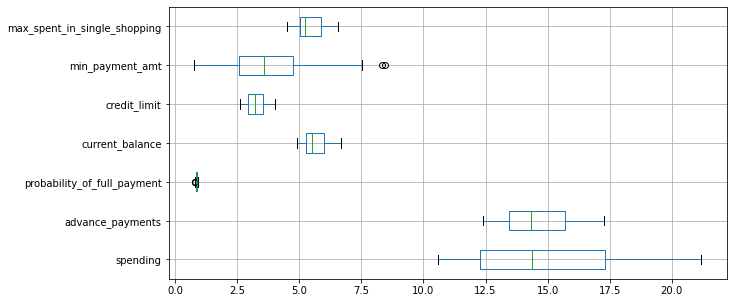

In [10]:
plt.figure(figsize=(10,5))
data.boxplot(vert=False)

### 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [11]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler 

In [12]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [13]:
scaled = X.fit_transform(data)

In [14]:
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = data.columns

In [15]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


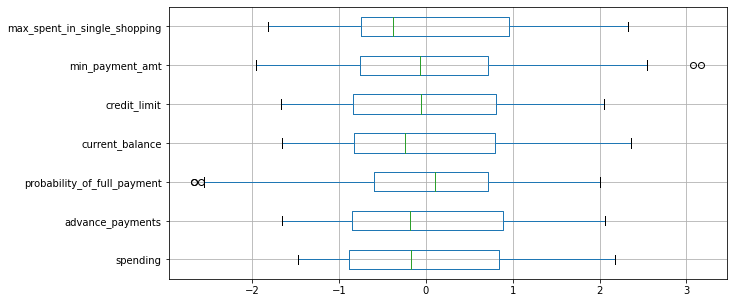

In [16]:
plt.figure(figsize=(10,5))
scaled_df.boxplot(vert=False)

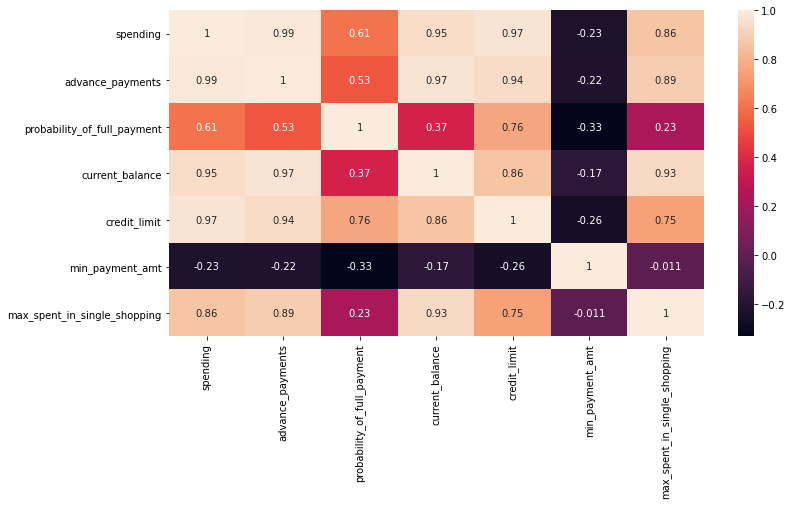

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True)

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
wardlink = linkage(scaled_df, method = 'ward')

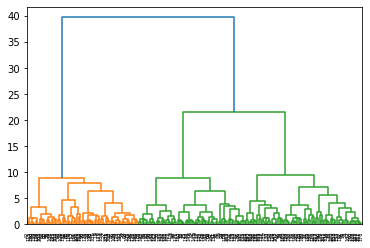

In [20]:
dend = dendrogram(wardlink)

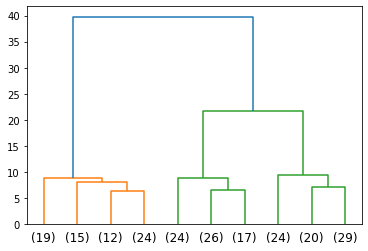

In [21]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [22]:
from scipy.cluster.hierarchy import fcluster

In [23]:
clusters = fcluster(wardlink, 15, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [24]:
data1 = data.copy()

In [25]:
data1['clusters'] = clusters

In [26]:
data1.head(7)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2


In [27]:
data1.to_csv('hc.csv')

In [28]:
# aggdata=data1.groupby('clusters').mean()
# aggdata['Freq']=data1.clusters.value_counts().sort_index()
# aggdata

## To find optimal clustering, performed PCA 

In [29]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,1.003722,-0.290039
1,0.358782,0.594688


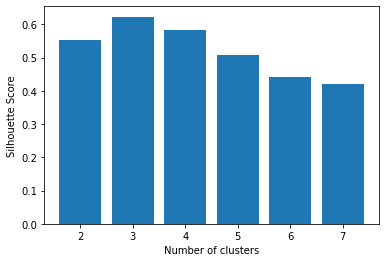

In [30]:
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [31]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(scaled_df)

AgglomerativeClustering(n_clusters=3)

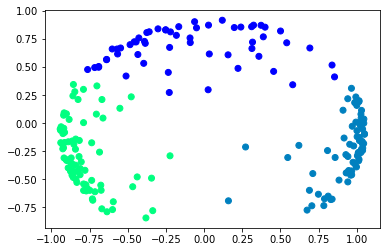

In [32]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [33]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [34]:
wss =[] 

In [35]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [36]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694]

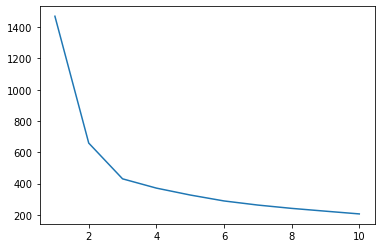

In [37]:
plt.plot(range(1,11), wss)

In [38]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels = k_means.labels_

In [39]:
data2 = data.copy()

In [40]:
data2["Clus_kmeans"] = labels
data2.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [42]:
silhouette_score(scaled_df,labels)

0.46577247686580914

In [43]:
sil_width = silhouette_samples(scaled_df,labels)

In [44]:
data2["sil_width"] = sil_width
data2.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.603797
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1,0.008748
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.678038
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.495306
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.548072


In [45]:
silhouette_samples(scaled_df,labels).min()

-0.006171238927461077

In [46]:
data2.to_csv('km.csv')

In [47]:
data2.Clus_kmeans.value_counts().sort_index()

0     77
1    133
Name: Clus_kmeans, dtype: int64

In [48]:
# clust_profile=data2
# clust_profile=clust_profile.groupby('Clus_kmeans').mean()
# clust_profile['freq']=data2.Clus_kmeans.value_counts().sort_index()
# clust_profile

### To find optimal clustering, performed PCA

In [49]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,1.003722,-0.290039
1,0.358782,0.594688


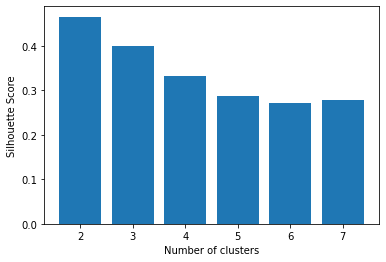

In [50]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(scaled_df, KMeans(n_clusters = n_cluster).fit_predict(scaled_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [51]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_principal)

KMeans(n_clusters=2)

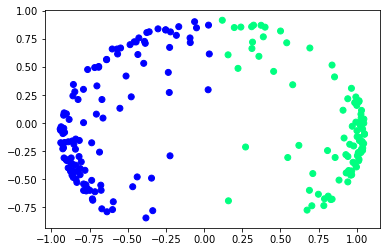

In [52]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 2).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

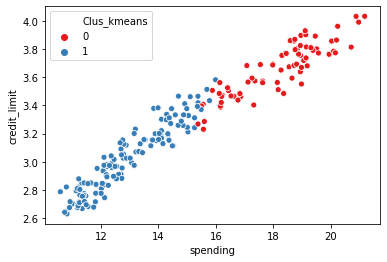

In [53]:
import seaborn as sns
#plot data with seaborn
sns.scatterplot(x = 'spending', y = 'credit_limit', hue = 'Clus_kmeans', data = data2, palette = 'Set1')
plt.show()

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.



In document

In [54]:
aggdata=data1.groupby('clusters').mean()
aggdata['Freq']=data1.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [55]:
clust_profile=data2
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=data2.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,freq
Clus_kmeans,,,,,,,,,
0,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,0.510837,77
1,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,0.439683,133


# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

2.5 Inference: Basis on these predictions, what are the business insights and recommendations

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [56]:
ins = pd.read_csv("insurance_part2_data.csv")

In [57]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [58]:
ins.info()

print("Size of the data",ins.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB
Size of the data (3000, 10)


In [59]:
ins.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [60]:
ins.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [61]:
dups = ins.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
ins[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [62]:
ins.drop_duplicates(inplace=True) 

In [63]:
print("After duplicate removel, shape of the data:",ins.shape)

After duplicate removel, shape of the data: (2861, 10)


## Box plot:


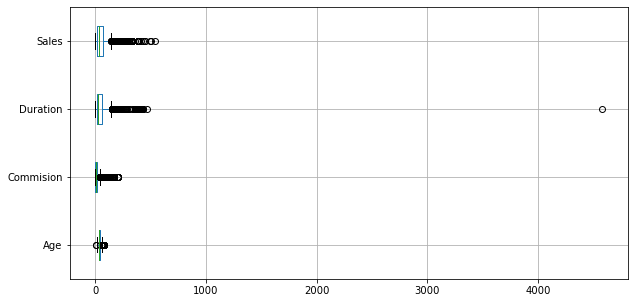

In [64]:
plt.figure(figsize=(10,5))
ins.boxplot(vert=False)

In [65]:
print("Max of sales:",ins['Sales'].max(), ", Min of sales:",ins['Sales'].min())
print("Max of Duration:",ins['Duration'].max(), ", Min of Duration:",ins['Duration'].min())
print("Max of Commision:",ins['Commision'].max(), ", Min of Commision:",ins['Commision'].min())
print("Max of Age:",ins['Age'].max(), ", Min of Age:",ins['Age'].min())

Max of sales: 539.0 , Min of sales: 0.0
Max of Duration: 4580 , Min of Duration: -1
Max of Commision: 210.21 , Min of Commision: 0.0
Max of Age: 84 , Min of Age: 8


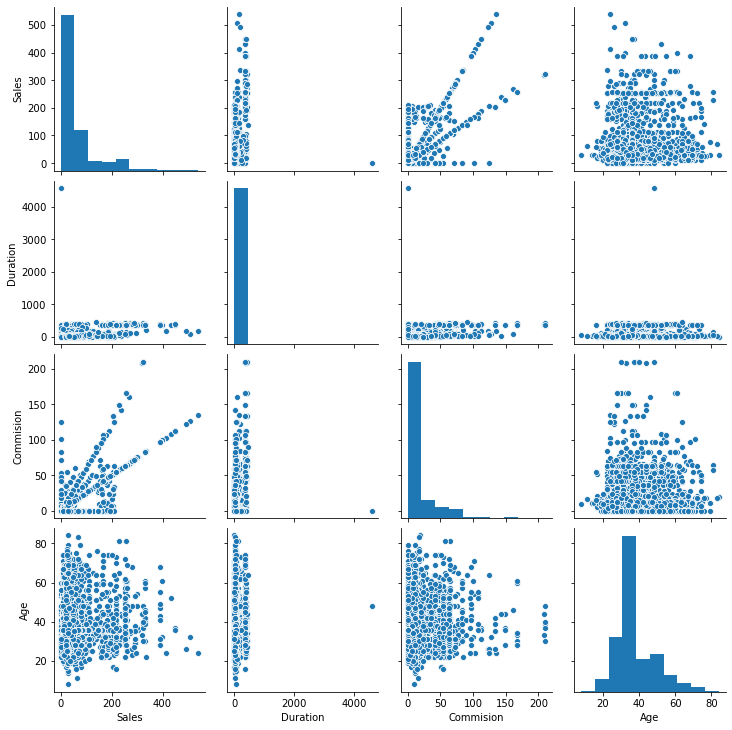

In [66]:
sns.pairplot(ins[['Sales', 'Duration', 'Commision', 'Age']])

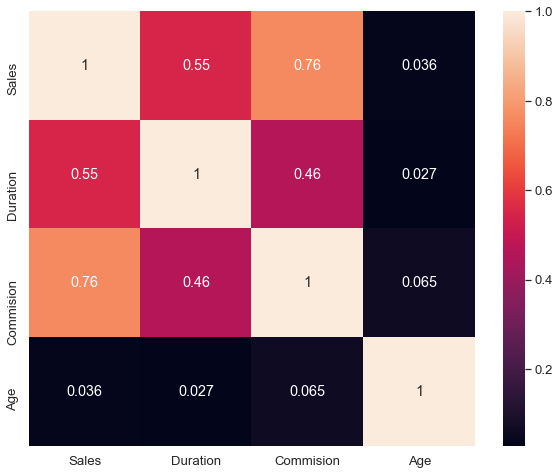

In [67]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(ins[['Sales', 'Duration', 'Commision', 'Age']].corr(), annot=True)

In [68]:
for feature in ins.columns: 
    if ins[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins[feature].unique()))
        print(pd.Categorical(ins[feature].unique()).codes)
        ins[feature] = pd.Categorical(ins[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [69]:
ins.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

## Extracting the target column into separate vectors for training set and test set


In [70]:
X = ins.drop("Claimed", axis=1)

y = ins.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


## Splitting data into training and test set

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=41)

In [72]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


## Building a Decision Tree Classifier

In [73]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150,20,10], 
    'min_samples_split': [150,200,250],
}

dtcl = DecisionTreeClassifier(random_state=41)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [74]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=150,
                       random_state=41)

In [75]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

### feature importance

In [76]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.589735
Sales         0.184781
Product Name  0.096404
Duration      0.063164
Commision     0.040492
Age           0.014651
Destination   0.010773
Type          0.000000
Channel       0.000000


### Prediciting the traning and test dataset

In [77]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### Getting the Predicted Classes and Probs

In [78]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.684211,0.315789
1,1.000000,0.000000
2,0.992000,0.008000
3,0.690909,0.309091
4,0.296610,0.703390


### Model Evaluation

### AUC and RUC curve - training data

AUC: 0.834


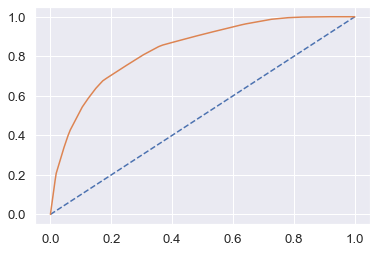

In [79]:
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and RUC curve - training data

AUC: 0.787


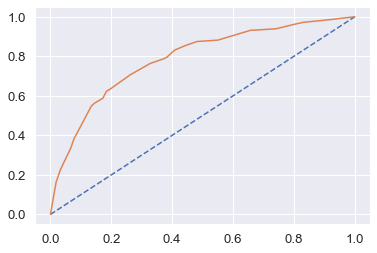

In [80]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion matrix for training data

In [81]:
confusion_matrix(train_labels, ytrain_predict)

array([[1197,  170],
       [ 262,  373]], dtype=int64)

In [82]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7842157842157842

In [83]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1367
           1       0.69      0.59      0.63       635

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.78      0.78      0.78      2002



In [84]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.59
cart_train_f1  0.63


### Confusion matrix - test data

In [85]:
confusion_matrix(test_labels, ytest_predict)

array([[496,  84],
       [122, 157]], dtype=int64)

In [86]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.760186263096624

In [87]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       580
           1       0.65      0.56      0.60       279

    accuracy                           0.76       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.75      0.76      0.76       859



In [88]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.65
cart_test_recall  0.56
cart_test_f1  0.6


## Random Forest

In [89]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [4,5],## 7,8,9
    'min_samples_leaf': [10,20],## 50,100
    'min_samples_split': [50,60,70],
    'n_estimators': [50,100] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1, oob_score=True)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [90]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'max_depth': [10], 'max_features': [4, 5],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [50, 100]})

In [91]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 60,
 'n_estimators': 50}

In [92]:
best_grid = grid_search.best_estimator_

In [93]:
best_grid 

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=60, n_estimators=50, oob_score=True,
                       random_state=1)

In [94]:
best_grid.oob_score_

0.7742257742257742

### Predicting the training and test data

In [95]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### RF Model Performance Evaluation on Training data

In [96]:
confusion_matrix(train_labels,ytrain_predict)

array([[1210,  157],
       [ 252,  383]], dtype=int64)

In [97]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7957042957042957

In [98]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1367
           1       0.71      0.60      0.65       635

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002



In [99]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.6
rf_train_f1  0.65


Area under Curve is 0.8582222119820978


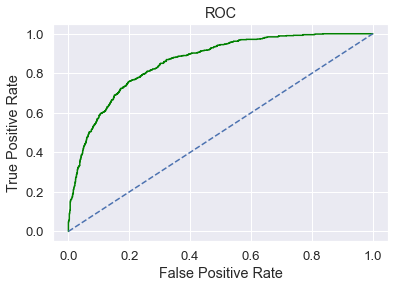

In [100]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test data

In [101]:
confusion_matrix(test_labels,ytest_predict)

array([[497,  83],
       [117, 162]], dtype=int64)

In [102]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7671711292200233

In [103]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       580
           1       0.66      0.58      0.62       279

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.73       859
weighted avg       0.76      0.77      0.76       859



In [104]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.66
rf_test_recall  0.58
rf_test_f1  0.62


Area under Curve is 0.8024657026325548


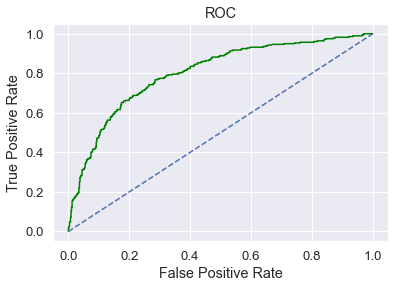

In [105]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [106]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.264740
Agency_Code   0.263667
Sales         0.184873
Duration      0.090690
Commision     0.080921
Age           0.049820
Type          0.046139
Destination   0.014137
Channel       0.005012


# Building a Neural Network Classifier

### Standardizing

In [107]:
sc = StandardScaler()

In [108]:
X_train = sc.fit_transform(X_train)

In [109]:
X_train

array([[ 0.53672739, -0.29677212,  0.81411958, ...,  0.23492816,
         0.2503874 ,  2.85978027],
       [-0.21436268,  0.70010336,  0.81411958, ...,  1.48239551,
        -0.53285569, -0.45729974],
       [ 0.16118235, -0.29677212,  0.81411958, ...,  3.62726142,
         1.0336305 ,  1.20124026],
       ...,
       [-1.62265658, -1.29364761, -1.22832078, ...,  0.32939116,
        -1.31609879, -0.45729974],
       [-1.90431535, -1.29364761, -1.22832078, ..., -0.08041159,
         1.8168736 , -0.45729974],
       [-0.8715665 ,  0.70010336,  0.81411958, ..., -0.04568254,
        -0.53285569, -0.45729974]])

In [110]:
scaled_df = pd.DataFrame(X_train)
scaled_df.columns = ins.columns
scaled_df.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.536727,-0.296772,0.814120,1.269190,0.125412,-0.425046,0.234928,0.250387,2.85978
1,-0.214363,0.700103,0.814120,-0.583081,0.125412,-0.241112,1.482396,-0.532856,-0.45730
2,0.161182,-0.296772,0.814120,7.610647,0.125412,2.006978,3.627261,1.033631,1.20124
3,4.198292,-1.293648,-1.228321,0.094370,0.125412,-0.356923,0.100179,1.033631,-0.45730
4,-0.214363,0.700103,0.814120,-0.583081,0.125412,-0.445484,0.246041,-0.532856,-0.45730


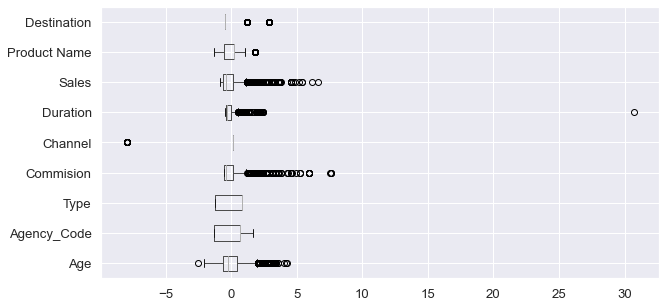

In [111]:
plt.figure(figsize=(10,5))
scaled_df.boxplot(vert=False)

In [112]:
X_test = sc.transform(X_test)

In [113]:
X_test

array([[-0.68379398,  0.70010336,  0.81411958, ..., -0.35129815,
         0.2503874 , -0.45729974],
       [-0.68379398,  0.70010336,  0.81411958, ..., -0.6152389 ,
        -0.53285569, -0.45729974],
       [-0.21436268,  0.70010336,  0.81411958, ..., -0.71248023,
        -0.53285569, -0.45729974],
       ...,
       [-1.62265658, -1.29364761, -1.22832078, ..., -0.58745566,
        -1.31609879, -0.45729974],
       [ 0.63061365,  0.70010336,  0.81411958, ..., -0.72637185,
        -0.53285569, -0.45729974],
       [-0.21436268,  0.70010336,  0.81411958, ..., -0.58745566,
        -0.53285569, -0.45729974]])

In [114]:
param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500,3000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [115]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [116]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

### Predicting the Training and Testing data

In [117]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### NN Model Performance Evaluation on Training data

In [118]:
confusion_matrix(train_labels,ytrain_predict)

array([[1232,  135],
       [ 333,  302]], dtype=int64)

In [119]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7662337662337663

In [120]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1367
           1       0.69      0.48      0.56       635

    accuracy                           0.77      2002
   macro avg       0.74      0.69      0.70      2002
weighted avg       0.76      0.77      0.75      2002



In [121]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.69
nn_train_recall  0.48
nn_train_f1  0.56


Area under Curve is 0.8020425208370534


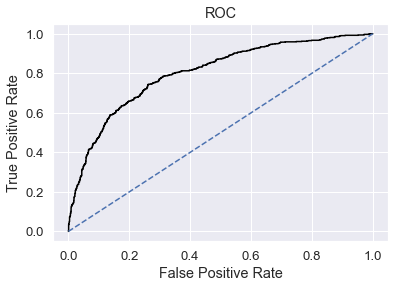

In [122]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data

In [123]:
confusion_matrix(test_labels,ytest_predict)

array([[506,  74],
       [145, 134]], dtype=int64)

In [124]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7450523864959255

In [125]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       580
           1       0.64      0.48      0.55       279

    accuracy                           0.75       859
   macro avg       0.71      0.68      0.69       859
weighted avg       0.73      0.75      0.73       859



In [126]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.64
nn_test_recall  0.48
nn_test_f1  0.55


Area under Curve is 0.785570386849586


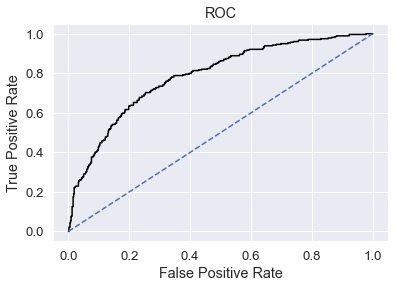

In [127]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [128]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

## Comparison of the performance metrics from the 3 models

In [129]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.76,0.80,0.77,0.77,0.75
AUC,0.83,0.79,0.86,0.80,0.80,0.79
Recall,0.59,0.56,0.60,0.58,0.48,0.48
Precision,0.69,0.65,0.71,0.66,0.69,0.64
F1 Score,0.63,0.60,0.65,0.62,0.56,0.55


### ROC Curve for the 3 models on the Training data

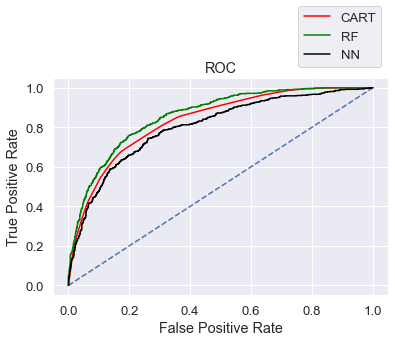

In [130]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

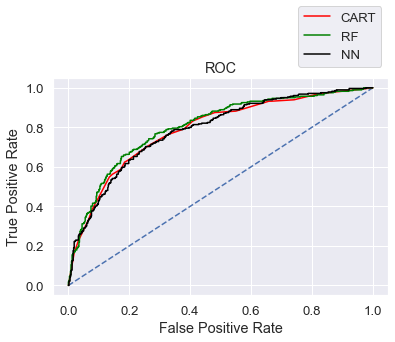

In [131]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

## Decision tree

### AUC and ROC curve - training data


AUC: 0.802


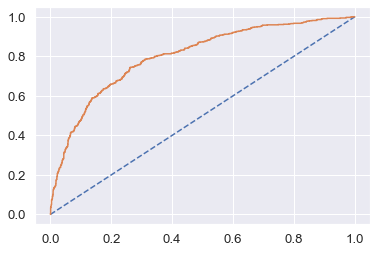

In [132]:
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC curve - test data

AUC: 0.786


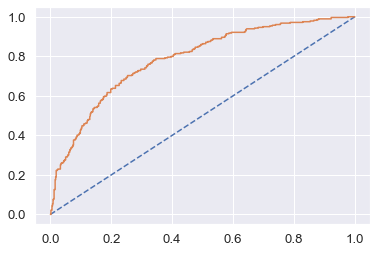

In [133]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion matrix for training data

In [134]:
confusion_matrix(train_labels, ytrain_predict)

array([[1232,  135],
       [ 333,  302]], dtype=int64)

In [135]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7662337662337663

In [136]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1367
           1       0.69      0.48      0.56       635

    accuracy                           0.77      2002
   macro avg       0.74      0.69      0.70      2002
weighted avg       0.76      0.77      0.75      2002



In [137]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.48
cart_train_f1  0.56


### Confusion matrix - test data

In [138]:
confusion_matrix(test_labels, ytest_predict)

array([[506,  74],
       [145, 134]], dtype=int64)

In [139]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7450523864959255

In [140]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       580
           1       0.64      0.48      0.55       279

    accuracy                           0.75       859
   macro avg       0.71      0.68      0.69       859
weighted avg       0.73      0.75      0.73       859



In [141]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.64
cart_test_recall  0.48
cart_test_f1  0.55


# Radom Forest

### RF Model Performance Evaluation on Training data

In [142]:
confusion_matrix(train_labels,ytrain_predict)

array([[1232,  135],
       [ 333,  302]], dtype=int64)

In [143]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7662337662337663

In [144]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1367
           1       0.69      0.48      0.56       635

    accuracy                           0.77      2002
   macro avg       0.74      0.69      0.70      2002
weighted avg       0.76      0.77      0.75      2002



In [145]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.69
rf_train_recall  0.48
rf_train_f1  0.56


Area under Curve is 0.8020425208370534


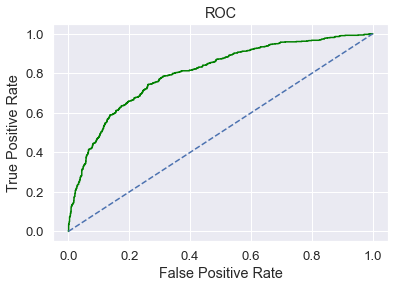

In [146]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test data

In [147]:
confusion_matrix(test_labels,ytest_predict)

array([[506,  74],
       [145, 134]], dtype=int64)

In [148]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7450523864959255

In [149]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       580
           1       0.64      0.48      0.55       279

    accuracy                           0.75       859
   macro avg       0.71      0.68      0.69       859
weighted avg       0.73      0.75      0.73       859



In [150]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.64
rf_test_recall  0.48
rf_test_f1  0.55


Area under Curve is 0.785570386849586


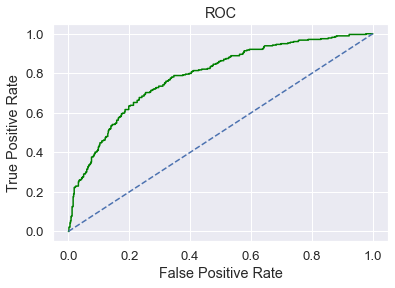

In [151]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [152]:
# # Variable Importance
# print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

###  Neural Netwrok

### NN Model Performance Evaluation on Training data

In [153]:
confusion_matrix(train_labels,ytrain_predict)

array([[1232,  135],
       [ 333,  302]], dtype=int64)

In [154]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7662337662337663

In [155]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1367
           1       0.69      0.48      0.56       635

    accuracy                           0.77      2002
   macro avg       0.74      0.69      0.70      2002
weighted avg       0.76      0.77      0.75      2002



In [156]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.69
nn_train_recall  0.48
nn_train_f1  0.56


Area under Curve is 0.8020425208370534


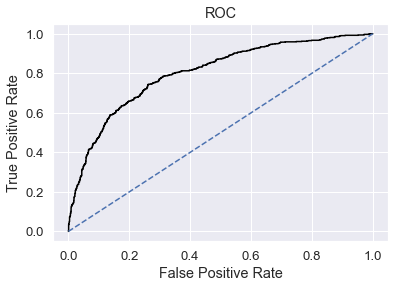

In [157]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data

In [158]:
confusion_matrix(test_labels,ytest_predict)

array([[506,  74],
       [145, 134]], dtype=int64)

In [159]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7450523864959255

In [160]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       580
           1       0.64      0.48      0.55       279

    accuracy                           0.75       859
   macro avg       0.71      0.68      0.69       859
weighted avg       0.73      0.75      0.73       859



In [161]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.64
nn_test_recall  0.48
nn_test_f1  0.55


Area under Curve is 0.785570386849586


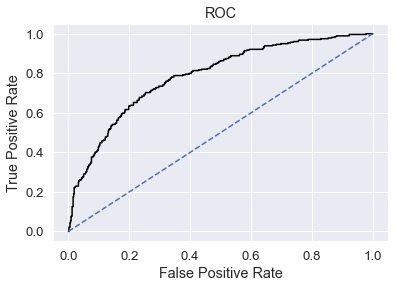

In [162]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [163]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.



## Comparison of the performance metrics from the 3 models

In [164]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.75,0.77,0.75,0.77,0.75
AUC,0.80,0.79,0.80,0.79,0.80,0.79
Recall,0.48,0.48,0.48,0.48,0.48,0.48
Precision,0.69,0.64,0.69,0.64,0.69,0.64
F1 Score,0.56,0.55,0.56,0.55,0.56,0.55


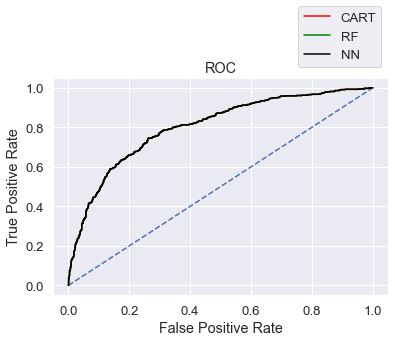

In [165]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

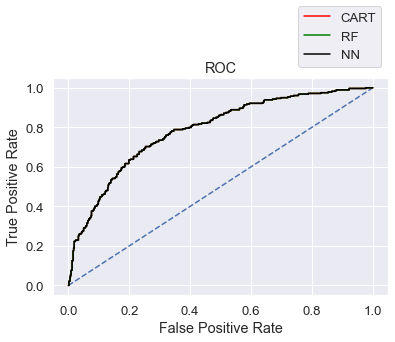

In [166]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# 2.5 Inference: Basis on these predictions, what are the business insights and recommendations


In Doc